# Causal Discovery on SEASFIRE Dataset

In [ ]:
# !pip install pybnesian causallearn pandas networkx matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
from utils import *

In [2]:
folder = "/home/emiliano/Documents/ISP/meditwin_workshop/causal-drought-fire/data/processed/"#/causal-drought-fire/data/processed/"

In [3]:
import glob
glob.glob(folder + "*.csv")

['/home/emiliano/Documents/ISP/meditwin_workshop/causal-drought-fire/data/processed/rotated_loadings_ws10.csv',
 '/home/emiliano/Documents/ISP/meditwin_workshop/causal-drought-fire/data/processed/dataframe_SeasFire_EDID_ET_8D_2001_2021.csv',
 '/home/emiliano/Documents/ISP/meditwin_workshop/causal-drought-fire/data/processed/PCA_correlation_matrix_ws10.csv',
 '/home/emiliano/Documents/ISP/meditwin_workshop/causal-drought-fire/data/processed/dataframe_ws10.csv']

In [4]:

data_path = "dataframe_SeasFire_EDID_ET_8D_2001_2021.csv"
df = pd.read_csv(folder+data_path)
df.head()

,Unnamed: 0,drought_ecosystem,drought_distance,drought_severity,drought_ecosys_1M,drought_ecosys_3M,drought_ecosys_6M,drought_ecosys_12M,drought_dist_1M,drought_dist_3M,...,swvl1,swvl2,swvl3,swvl4,t2m_max,t2m_mean,t2m_min,tp,vpd,ws10
0,0,0.0,5.622328,0.0,0.0,0.0,0.0,0.0,5.622328,5.622328,...,0.305250,0.306393,0.148809,0.306593,282.97388,281.39722,279.44278,76.351990,1.805403,6.368570
1,1,0.0,5.622328,0.0,0.0,0.0,0.0,0.0,5.622328,5.622328,...,0.296929,0.299654,0.148582,0.308864,279.18283,277.36752,275.49326,34.510662,1.886388,5.340193
2,2,0.0,5.622328,0.0,0.0,0.0,0.0,0.0,5.622328,5.622328,...,0.293871,0.295429,0.144639,0.307132,281.57010,279.38480,277.04614,54.702568,1.406108,5.256960
3,3,0.0,5.622328,0.0,0.0,0.0,0.0,0.0,5.622328,5.622328,...,0.299307,0.301484,0.149155,0.306837,280.44977,278.75024,277.02512,24.830835,1.459190,4.545062
4,4,0.0,5.622328,0.0,0.0,0.0,0.0,0.0,5.622328,5.622328,...,0.304691,0.305012,0.148286,0.306945,283.02057,281.62106,279.96985,83.491295,1.752788,6.687118


In [6]:
df.shape[0]/1e6

6.599712

In [7]:
df = df.loc[df.lccs_class_2>80]
df.shape[0]/1e6

0.317906

In [8]:
df.columns

Index(['Unnamed: 0', 'drought_ecosystem', 'drought_distance',
       'drought_severity', 'drought_ecosys_1M', 'drought_ecosys_3M',
       'drought_ecosys_6M', 'drought_ecosys_12M', 'drought_dist_1M',
       'drought_dist_3M', 'drought_dist_6M', 'drought_dist_12M', 'latitude',
       'longitude', 'time', 'cams_co2fire', 'cams_frpfire', 'drought_code_max',
       'drought_code_mean', 'fcci_ba', 'fcci_ba_valid_mask',
       'fcci_fraction_of_burnable_area', 'fcci_fraction_of_observed_area',
       'fcci_number_of_patches', 'fwi_max', 'fwi_mean', 'gfed_ba',
       'gfed_ba_valid_mask', 'gwis_ba', 'gwis_ba_valid_mask', 'lai',
       'lccs_class_0', 'lccs_class_1', 'lccs_class_2', 'lccs_class_3',
       'lccs_class_4', 'lccs_class_5', 'lccs_class_6', 'lccs_class_7',
       'lccs_class_8', 'lst_day', 'mslp', 'ndvi', 'oci_ao', 'oci_censo',
       'oci_ea', 'oci_epo', 'oci_gmsst', 'oci_nao', 'oci_nina34_anom',
       'oci_pdo', 'oci_pna', 'oci_soi', 'oci_wp', 'pop_dens', 'rel_hum', 'skt',
     

In [10]:
selected_vars = ["drought_distance","drought_ecosystem","fwi_mean","ndvi","oci_nao","pop_dens","rel_hum","vpd","t2m_mean"]

In [11]:
data = df[selected_vars].dropna()
data.shape


(316983, 9)

## 1. Structure Learning using PyBnesian

In [13]:
from pybnesian import PC, LinearCorrelation

In [14]:
pcMod = PC()
# the data goes into the inependence test object which is weird
linCorr = LinearCorrelation(data)
alpha = 0.1
g = pcMod.estimate(hypot_test=linCorr, alpha=alpha)

In [15]:
# nodes of graph
g.nodes()

['drought_distance',
 'drought_ecosystem',
 'fwi_mean',
 'ndvi',
 'oci_nao',
 'pop_dens',
 'rel_hum',
 'vpd',
 't2m_mean']

In [16]:
# edges (undirected)
g.edges()

[('drought_ecosystem', 'pop_dens')]

In [17]:
# arcs (directed)
g.arcs()

[('drought_distance', 'drought_ecosystem'),
 ('drought_distance', 'pop_dens'),
 ('drought_ecosystem', 'oci_nao'),
 ('ndvi', 'fwi_mean'),
 ('drought_distance', 'ndvi'),
 ('ndvi', 'rel_hum'),
 ('ndvi', 'pop_dens'),
 ('fwi_mean', 't2m_mean'),
 ('drought_distance', 't2m_mean'),
 ('ndvi', 'vpd'),
 ('vpd', 't2m_mean'),
 ('oci_nao', 'vpd'),
 ('t2m_mean', 'fwi_mean'),
 ('rel_hum', 'fwi_mean'),
 ('vpd', 'oci_nao'),
 ('pop_dens', 'fwi_mean'),
 ('pop_dens', 'rel_hum'),
 ('drought_ecosystem', 'vpd'),
 ('drought_ecosystem', 'fwi_mean'),
 ('rel_hum', 't2m_mean'),
 ('t2m_mean', 'ndvi'),
 ('oci_nao', 'ndvi'),
 ('ndvi', 'drought_ecosystem'),
 ('drought_distance', 'oci_nao'),
 ('rel_hum', 'vpd'),
 ('t2m_mean', 'rel_hum'),
 ('vpd', 'fwi_mean'),
 ('t2m_mean', 'vpd')]

In [18]:
# get parents of fwi_mean
g.parents("fwi_mean")

['ndvi', 'drought_ecosystem', 'rel_hum', 'vpd', 'pop_dens', 't2m_mean']

In [19]:
# number of arcs and edges
print(g.num_arcs())
print(g.num_edges())

28
1


In [20]:
# get the adjacency matrix from edge and arc list
arcs = g.arcs()
edges = g.edges()
nodes = g.nodes()


In [21]:
adjacency_matrix = get_adjacency_matrix(arcs, edges, nodes)
adjacency_matrix

,drought_distance,drought_ecosystem,fwi_mean,ndvi,oci_nao,pop_dens,rel_hum,vpd,t2m_mean
drought_distance,0,1,0,1,1,1,0,0,1
drought_ecosystem,0,0,1,0,1,1,0,1,0
fwi_mean,0,0,0,0,0,0,0,0,1
ndvi,0,1,1,0,0,1,1,1,0
oci_nao,0,0,0,1,0,0,0,1,0
pop_dens,0,1,1,0,0,0,1,0,0
rel_hum,0,0,1,0,0,0,0,1,1
vpd,0,0,1,0,1,0,0,0,1
t2m_mean,0,0,1,1,0,0,1,1,0


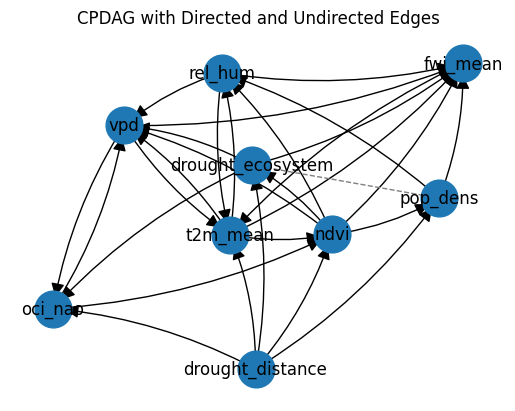

In [22]:
draw_cpdag(arcs, edges, nodes, arrowsize=20)

### Lets try a nonlinear independence test

In [23]:
from pybnesian import KMutualInformation

In [24]:
import time
def run_nonlinearPC(data, num_samples):
    print("num samples: ", num_samples)
    t0 = time.time()
    pcMod = PC()
    # the data goes into the inependence test object which is weird
    dat = data.sample(num_samples)
    km = KMutualInformation(dat, k=5)
    alpha = 0.1
    g = pcMod.estimate(hypot_test=km, alpha=alpha)
    t1 = time.time()
    print("Time taken: ", t1-t0)
    return {"cpdag":g, "time":t1-t0}


In [25]:
n = 250
res = run_nonlinearPC(data, n)

num samples:  250
Time taken:  78.77236771583557


In [26]:
ns = [50, 100, 150, 250]
res = [run_nonlinearPC(data, n) for n in ns]

num samples:  50
Time taken:  5.010294437408447
num samples:  100
Time taken:  16.528704404830933
num samples:  150
Time taken:  19.63196063041687
num samples:  250
Time taken:  53.53170680999756


In [27]:
ts = [r["time"] for r in res]

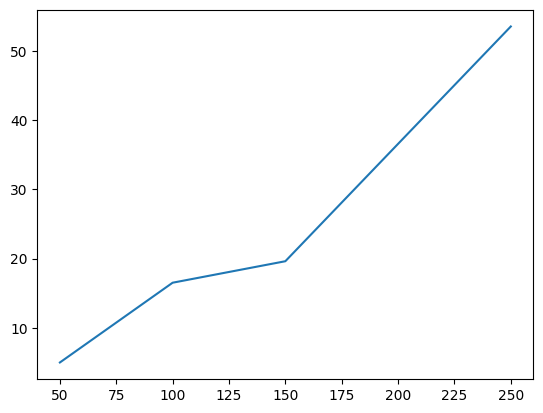

In [28]:
plt.plot(ns, ts)

In [29]:
g = res[-1]["cpdag"]  

In [30]:
# get the adjacency matrix from edge and arc list
arcs = g.arcs()
edges = g.edges()
nodes = g.nodes()


In [31]:
adjacency_matrix = get_adjacency_matrix(arcs, edges, nodes)
adjacency_matrix

,drought_distance,drought_ecosystem,fwi_mean,ndvi,oci_nao,pop_dens,rel_hum,vpd,t2m_mean
drought_distance,0,1,0,0,0,0,0,0,0
drought_ecosystem,1,0,0,0,0,0,0,0,0
fwi_mean,0,0,0,0,0,0,0,0,0
ndvi,0,0,0,0,0,0,0,0,1
oci_nao,0,0,0,0,0,0,0,0,0
pop_dens,0,0,0,0,0,0,0,0,0
rel_hum,0,0,0,0,0,0,0,1,1
vpd,0,0,0,0,0,0,1,0,1
t2m_mean,0,0,0,1,0,0,1,1,0


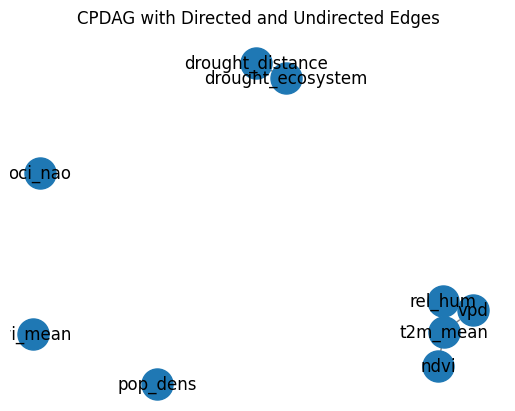

In [32]:
draw_cpdag(arcs, edges, nodes, node_size=500)

In [33]:
### using gaussian noise assumption
from pybnesian import MutualInformation

In [ ]:
def run_nonlinearPC(data, num_samples):
    print("num samples: ", num_samples)
    t0 = time.time()
    pcMod = PC()
    # the data goes into the inependence test object which is weird
    dat = data.sample(num_samples)
    mi = MutualInformation(dat)
    alpha = 0.1
    gdraw_cpdag(arcs, edges, nodes, node_size=500) = pcMod.estimate(hypot_test=mi, alpha=alpha)
    t1 = time.time()
    print("Time taken: ", t1-t0)
    return {"cpdag":g, "time":t1-t0}


In [35]:
n = data.shape[0]
res = run_nonlinearPC(data, n)

num samples:  316983
Time taken:  98.5175302028656


In [36]:
g = res["cpdag"]  

In [37]:
# get the adjacency matrix from edge and arc list
arcs = g.arcs()
edges = g.edges()
nodes = g.nodes()


In [36]:
adjacency_matrix = get_adjacency_matrix(arcs, edges, nodes)
adjacency_matrix

,drought_distance,drought_ecosystem,fwi_mean,ndvi,oci_nao,pop_dens,rel_hum,vpd,t2m_mean
drought_distance,0,1,0,1,1,1,0,0,1
drought_ecosystem,0,0,1,0,1,1,0,1,0
fwi_mean,0,0,0,0,0,0,0,0,1
ndvi,0,1,1,0,0,1,1,1,0
oci_nao,0,0,0,1,0,0,0,1,0
pop_dens,0,1,1,0,0,0,1,0,0
rel_hum,0,0,1,0,0,0,0,1,1
vpd,0,0,1,0,1,0,0,0,1
t2m_mean,0,0,1,1,0,0,1,1,0


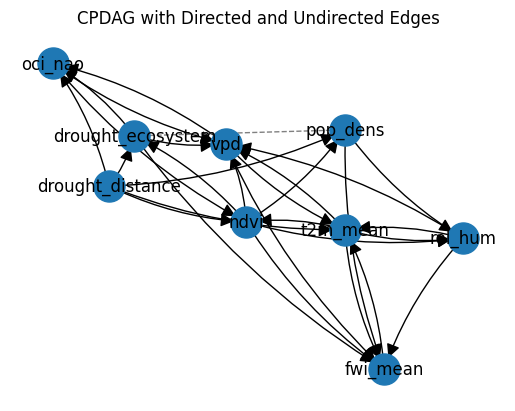

In [37]:
draw_cpdag(arcs, edges, nodes, node_size=500, arrowsize=20)

### lets try banning edges and arcs

In [48]:
from itertools import combinations, permutations, product
# enforced arcs - directed
whiteArcList = [('pop_dens','fwi_mean')]
#banned edges
blackArcList = [('vpd','oci_nao'),('drought_distance','oci_nao'),('drought_ecosystem','oci_nao')]#list( product(set(nodes).difference("oci_nao"), ["oci_nao"]))

# banned edges - undirected
#blackEdgeList = [('pop_dens','oci_nao')] #list(product(['x','y'],Zs_nms))
# enforced edges - undirected
#whiteEdgeList = [('rel_hum','ndvi')]


In [49]:
blackArcList

[('vpd', 'oci_nao'),
 ('drought_distance', 'oci_nao'),
 ('drought_ecosystem', 'oci_nao')]

In [50]:
def run_nonlinearPC(data, num_samples):
    print("num samples: ", num_samples)
    t0 = time.time()
    pcMod = PC()
    # the data goes into the inependence test object which is weird
    dat = data.sample(num_samples)
    mi = MutualInformation(dat)
    alpha = 0.1
    g = pcMod.estimate(hypot_test=mi, alpha=alpha,arc_whitelist=whiteArcList,arc_blacklist=blackArcList, verbose=True)
    t1 = time.time()
    print("Time taken: ", t1-t0)
    return {"cpdag":g, "time":t1-t0}


In [51]:
n = data.shape[0]
res = run_nonlinearPC(data, n)

num samples:  316983
[�Time taken:  86.56331968307495         ] 58% :00s] No sepset
✔  [████████████████████████████████████████] 100% :26s] Finished PC!uless                     ] 39% :00s] Sepset Order 1               ] 12% :03s] Sepset Order 2


In [52]:
g = res["cpdag"]  

In [53]:
# get the adjacency matrix from edge and arc list
arcs = g.arcs()
edges = g.edges()
nodes = g.nodes()


In [58]:
edges

[]

In [57]:
arcs

[('ndvi', 'fwi_mean'),
 ('drought_distance', 'ndvi'),
 ('ndvi', 'rel_hum'),
 ('ndvi', 'drought_ecosystem'),
 ('ndvi', 'pop_dens'),
 ('drought_ecosystem', 'pop_dens'),
 ('fwi_mean', 't2m_mean'),
 ('drought_distance', 't2m_mean'),
 ('ndvi', 'vpd'),
 ('vpd', 't2m_mean'),
 ('drought_ecosystem', 'vpd'),
 ('pop_dens', 'fwi_mean'),
 ('oci_nao', 'drought_ecosystem'),
 ('oci_nao', 'drought_distance'),
 ('t2m_mean', 'vpd'),
 ('vpd', 'fwi_mean'),
 ('pop_dens', 'rel_hum'),
 ('oci_nao', 'vpd'),
 ('drought_ecosystem', 'drought_distance'),
 ('rel_hum', 'vpd'),
 ('pop_dens', 'drought_distance'),
 ('t2m_mean', 'rel_hum'),
 ('rel_hum', 'fwi_mean'),
 ('t2m_mean', 'fwi_mean'),
 ('drought_ecosystem', 'fwi_mean'),
 ('rel_hum', 't2m_mean'),
 ('t2m_mean', 'ndvi'),
 ('oci_nao', 'ndvi')]

In [54]:
adjacency_matrix = get_adjacency_matrix(arcs, edges, nodes)
adjacency_matrix

,drought_distance,drought_ecosystem,fwi_mean,ndvi,oci_nao,pop_dens,rel_hum,vpd,t2m_mean
drought_distance,0,0,0,1,0,0,0,0,1
drought_ecosystem,1,0,1,0,0,1,0,1,0
fwi_mean,0,0,0,0,0,0,0,0,1
ndvi,0,1,1,0,0,1,1,1,0
oci_nao,1,1,0,1,0,0,0,1,0
pop_dens,1,0,1,0,0,0,1,0,0
rel_hum,0,0,1,0,0,0,0,1,1
vpd,0,0,1,0,0,0,0,0,1
t2m_mean,0,0,1,1,0,0,1,1,0


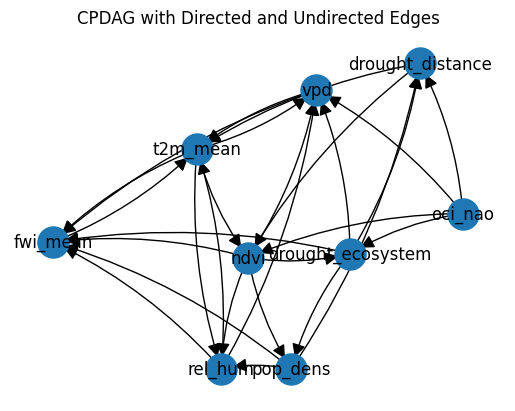

In [56]:
draw_cpdag(arcs, edges, nodes, node_size=500, arrowsize=20)

## 2. Structure Learning using CausalLearn

In [16]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz, kci
from causallearn.utils.GraphUtils import GraphUtils
data_matrix = data.to_numpy()
pc_result = pc(data_matrix, alpha=0.1, indep_test_func=fisherz)


Depth=7, working on node 8: 100%|██████████| 9/9 [00:00<00:00, 1630.54it/s]


In [25]:
arcs_edges = pc_result.find_adj()
len(arcs_edges)

50

In [55]:
adj_mat = pc_result.G.graph
adj_mat

array([[ 0, -1,  0, -1,  1,  1,  0,  0,  1],
       [ 1,  0,  1, -1,  1,  1,  0,  1,  0],
       [ 0, -1,  0, -1,  0,  1,  1,  1,  1],
       [ 1,  1,  1,  0,  1,  1,  1,  1,  1],
       [-1, -1,  0, -1,  0,  0,  0, -1,  0],
       [-1, -1, -1, -1,  0,  0, -1,  0,  0],
       [ 0,  0, -1, -1,  0,  1,  0, -1,  1],
       [ 0, -1, -1, -1,  1,  0,  1,  0,  1],
       [-1,  0, -1, -1,  0,  0, -1, -1,  0]])

In [ ]:
nodes = list(data.columns)
len(nodes)

In [42]:
node_idx = np.arange(len(nodes), dtype=int)

In [67]:
from itertools import combinations, permutations, product
combo_list = list(combinations(node_idx,2))

arcs = []
edges = []
for combo in combo_list:
    if (adj_mat[combo[0], combo[1]] == -1) & (adj_mat[combo[1], combo[0]] == 1):
        arcs.append(combo)
    if (adj_mat[combo[0], combo[1]] == 1) & (adj_mat[combo[1], combo[0]] == -1):
        arcs.append((combo[1], combo[0]))
    elif (adj_mat[combo[0], combo[1]] == 1) & (adj_mat[combo[0], combo[1]] == 1):   
        edges.append(combo)
    else:
        pass

In [68]:
len(arcs)

25

In [69]:
edges = [(nodes[e[0]],nodes[e[1]]) for e in edges]
arcs = [(nodes[a[0]],nodes[a[1]]) for a in arcs]

In [71]:
adjacency_matrix = get_adjacency_matrix(arcs, edges, nodes)
adjacency_matrix

,drought_distance,drought_ecosystem,fwi_mean,ndvi,oci_nao,pop_dens,rel_hum,vpd,t2m_mean
drought_distance,0,1,0,1,0,0,0,0,0
drought_ecosystem,0,0,0,1,0,0,0,0,0
fwi_mean,0,1,0,1,0,0,0,0,0
ndvi,0,0,0,0,0,0,0,0,0
oci_nao,1,1,0,1,0,0,0,1,0
pop_dens,1,1,1,1,0,0,1,0,0
rel_hum,0,0,1,1,0,0,0,1,0
vpd,0,1,1,1,0,0,0,0,0
t2m_mean,1,0,1,1,0,0,1,1,0


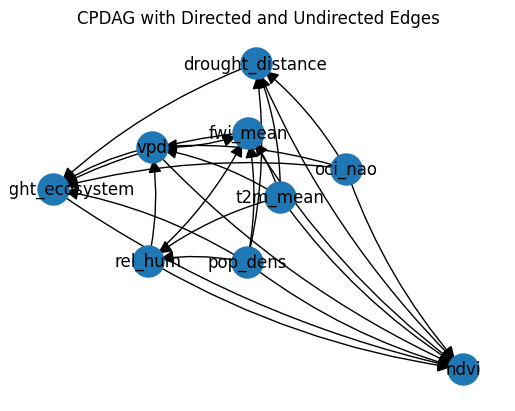

In [72]:
draw_cpdag(arcs, edges, nodes, node_size=500, arrowsize=20)

# 3. Compute metrics

In [75]:
from cdt.metrics import SID, SHD

In [76]:
from cdt.metrics import SHD

from numpy.random import randint

tar, pred = randint(2, size=(10, 10)), randint(2, size=(10, 10))



In [78]:
tar

array([[0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
       [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 0, 1, 0, 1]])

In [77]:
SHD(tar, pred, double_for_anticausal=False)


np.float64(39.5)